<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
import numpy as np
import math
from math import pi
import torch
from matplotlib import pyplot as plt
from torch.distributions import MultivariateNormal
from miniai.lsh import LSH

In [ ]:
torch.manual_seed(256)
torch.set_printoptions(precision=5, linewidth=140)

In [ ]:
n_clusters = 6
n_samples= 250

In [ ]:
centroids = torch.randn(n_clusters, 2) * 70 - 35

In [ ]:
def sample(c): return MultivariateNormal(c, torch.diag(torch.tensor([5., 5.]))).sample((n_samples,))

In [ ]:
data = torch.concat([sample(c) for c in centroids], axis=0)

In [ ]:
data.shape

torch.Size([1500, 2])

In [ ]:
def plot_data(centroids, data, ax=None):
    if ax is None: fig, ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:, 0], samples[:, 1], s = 1)
        ax.plot(*centroid, markersize=10, marker="x", color="k", mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color="m", mew=3)

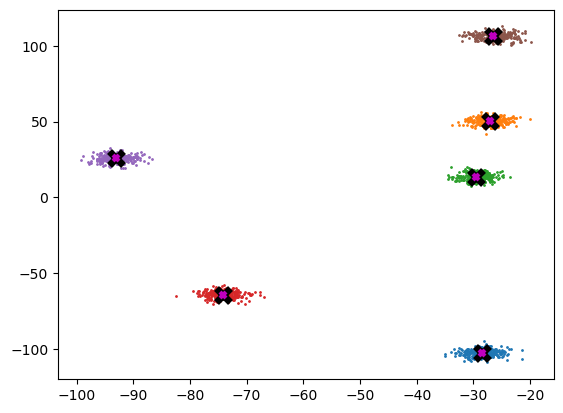

In [ ]:
plot_data(centroids, data)

In [ ]:
X = data.clone()

In [ ]:
x = X[0]

In [ ]:
lsh = LSH(2, 2, 3)

In [ ]:
Xh = lsh.hashing(X)

In [ ]:
def one_update(X):
    for i, x in enumerate(X):
        dist, idx = lsh.query_neigbours(x[None], X, Xh, 150)
        # removing weighting because lsh already returns in a sorted order
        # and we are requesting for nearest neighbours

        X[i] = X[idx].sum(0)/len(idx)

In [ ]:
def meanshift(data):
    X = data.clone()
    for i in range(5): one_update(X)
    return X

3.76 s ± 384 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
Y = meanshift(data)

In [ ]:
Y

tensor([[ -28.38632, -102.51652],
        [ -28.34384, -102.53816],
        [ -28.34400, -102.53811],
        ...,
        [ -26.40479,  106.70017],
        [ -26.35939,  106.70464],
        [ -26.35950,  106.70462]])

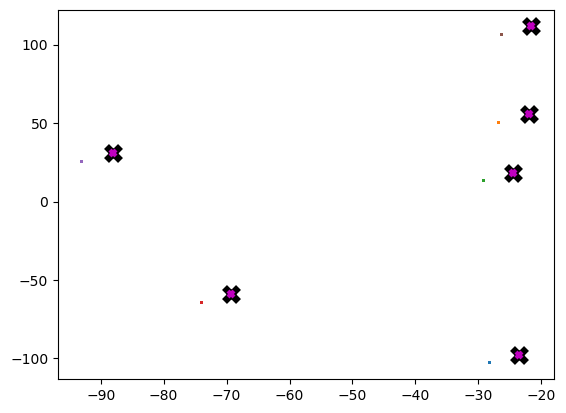

In [ ]:
plot_data(centroids+5, Y)

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
def animate(d):
    if not d: return plot_data(centroids + 5, X, ax=ax)
    one_update(X)
    ax.clear()
    plot_data(centroids + 5, X, ax=ax)

In [ ]:
X= data.clone()
fig, ax = plt.subplots()
f = FuncAnimation(fig, animate, frames=5, interval=500, repeat=False)
plt.close()
HTML(f.to_jshtml())